![alt text](https://i.imgur.com/1WaY7aA.png)

# Lab 6.3
# *KNN classification Lab*

**In this lab, we will:**
- Practice KNN classification on a dataset of breast cancer.
- Predict the `diagnoosis` of a patient from predictor variables of your choice.

### 1. Load Data

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server: ftp ftp.cs.wisc.edu cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information:

1) ID number 2) Diagnosis (M = malignant, B = benign) 3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter) b) texture (standard deviation of gray-scale values) c) perimeter d) area e) smoothness (local variation in radius lengths) f) compactness (perimeter^2 / area - 1.0) g) concavity (severity of concave portions of the contour) h) concave points (number of concave portions of the contour) i) symmetry j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

In [2]:
## Import Libraries

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

import seaborn as sns

In [3]:
from sklearn.datasets import load_breast_cancer

In [35]:
columns = ['id', 'diagnosis']
for k in ['mean', 'std_error', 'worst']:
    for c in ['radius', 'texture', 'perimeter', 'area', 'smoothness',
              'compactness', 'concavity', 'concave_points', 'symmetry', 'fractal_dimension']:
        columns.append('%s_%s' % (c, k))
# breast_cancer = pd.read_csv('../data/breast-cancer-wisconsin-data.csv', names=columns, index_col='id')
data= pd.read_csv('data/wdbc.csv', names=columns, index_col='id')

### 2. EDA 

Explore dataset. Clean data. Find correlation. 

In [36]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [37]:
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_std_error', 'texture_std_error', 'perimeter_std_error',
       'area_std_error', 'smoothness_std_error', 'compactness_std_error',
       'concavity_std_error', 'concave_points_std_error', 'symmetry_std_error',
       'fractal_dimension_std_error', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [38]:
data.shape

(569, 31)

### 3. Set up the `diagnosis` variable as your target. How many classes are there?

In [39]:
y = data['diagnosis']

### 4. What is the baseline accuracy?

In [40]:
data.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [41]:
baseline_accuracy = 212/(212+357)
print('accuracy base= %.4f' %
      baseline_accuracy)

accuracy base= 0.3726


### 5. Choose features to be your predictor variables and set up your X.

In [44]:
feature_cols = [c for c in data.columns if c != 'diagnosis']
X = data[feature_cols]

In [45]:
print('X is a %s' % type(X))
print('X has %d rows and %d columns' % X.shape)
print('Basic Statistics about X%s' % ('_'*50))
print(X.describe())
print('')
print('Sample of X%s' % ('_'*50))
print(X.head())

X is a <class 'pandas.core.frame.DataFrame'>
X has 569 rows and 30 columns
Basic Statistics about X__________________________________________________
       radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave_points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.01406

### 6. Fit a `KNeighborsClassifier` with 1 neighbor using the target and predictors.

In [46]:
# ANSWER
# Make an instance of a KNeighborsClassifier object with 1 neighbor
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=1)

# fit on the unstandardized data:
classifier.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

### 7. Evaluate the accuracy of your model.
- Is it better than baseline?
- Is it legitimate?

In [47]:
# ANSWER
# predict the response values for the observations in X ("test the model")
y_pred = classifier.predict(X)
print('accuracy (train)= %.4f' %
      accuracy_score(y, y_pred))
# store the predicted response values


accuracy (train)= 1.0000


### 8. Create a 80-20 train-test-split of your target and predictors. Refit the KNN and assess the accuracy.

In [48]:
# ANSWER
# STEP 1: split X and y into training and testing sets (using random_state for reproducibility)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
y_pred = classifier.predict(X_test)
# STEP 2: train the model on the training set (using K=1)
classifier = KNeighborsClassifier(n_neighbors=1)
classifier.fit(X_train, y_train)

# STEP 3: test the model on the testing set, and check the accuracy
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('accuracy (train)= %.4f' %
      accuracy_score(y_test, y_pred))

[[72  0]
 [ 0 42]]
              precision    recall  f1-score   support

           B       1.00      1.00      1.00        72
           M       1.00      1.00      1.00        42

    accuracy                           1.00       114
   macro avg       1.00      1.00      1.00       114
weighted avg       1.00      1.00      1.00       114

accuracy (train)= 1.0000


### 9. Evaluate the test accuracy of a KNN where K == number of rows in the training data.

In [60]:
# ANSWER
# Create an instance of KNeighborsClassifier where n_neighbors = number of rows in the training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
y_pred = classifier.predict(X_test)
# Fit Train Data
classifier = KNeighborsClassifier(n_neighbors=X_train.shape[0])
classifier.fit(X_train, y_train)

# Print accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('accuracy (train)= %.4f' %
      accuracy_score(y_test, y_pred))

[[75  0]
 [39  0]]
              precision    recall  f1-score   support

           B       0.66      1.00      0.79        75
           M       0.00      0.00      0.00        39

    accuracy                           0.66       114
   macro avg       0.33      0.50      0.40       114
weighted avg       0.43      0.66      0.52       114

accuracy (train)= 0.6579


/Users/Liuyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### 10. Fit the KNN at values of K from 1 to the number of rows in the training data.
- Store the test accuracy in a list.
- Plot the test accuracy vs. the number of neighbors.

In [61]:
# ANSWER
error = []
# plot test accuracy by number of neighbors:
for i in range(1, X_train.shape[0]+1):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

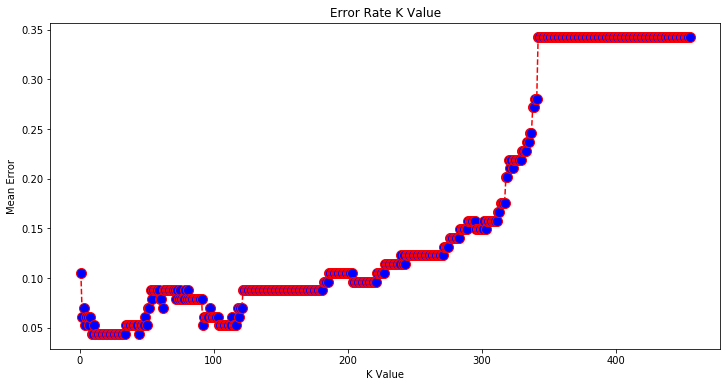

In [63]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, X_train.shape[0]+1), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [64]:
# ANSWER
accuracy = []
# plot test accuracy by number of neighbors:
for i in range(1, X_train.shape[0]+1):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    accuracy.append(knn.score(X_test, y_test))

Text(0, 0.5, 'Accuracy Score')

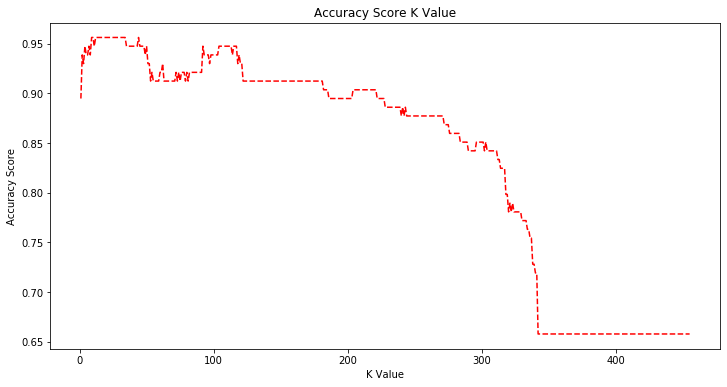

In [66]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, X_train.shape[0]+1), accuracy, color='red', linestyle='dashed', marker=None,
         markerfacecolor='blue', markersize=10)
plt.title('Accuracy Score K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy Score')

### 11. Fit KNN across different values of K and plot the mean cross-validated accuracy with 5 folds.


In [67]:
# ANSWER
# simulate splitting a dataset of 569 observations into 5 folds
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=False)

In [82]:
from sklearn.model_selection import cross_val_score

# 5-fold cross-validation with K=5 for KNN (the n_neighbors parameter)
# k = 5 for KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

# Use cross_val_score function
# We are passing the entirety of X and y, not X_train or y_train, it takes care of splitting the dat
# cv=5 for 5 folds
# scoring='accuracy' for evaluation metric - althought they are many
scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
print(scores)

[0.88695652 0.93913043 0.9380531  0.94690265 0.92920354]


### 12. Standardize the predictor matrix and cross-validate across the different K.
- Plot the standardized mean cross-validated accuracy against the unstandardized. Which is better?
- Why?

In [83]:
# ANSWER
# Standarize X
# Load libraries
from sklearn import preprocessing
import numpy as np

# Create scaler
scaler = preprocessing.StandardScaler()

# Transform the feature
standardized = scaler.fit_transform(X)


In [84]:
kf = KFold(n_splits=5, shuffle=False)

In [85]:
# 5-fold cross-validation with K=5 for KNN (the n_neighbors parameter)
# k = 5 for KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

# Use cross_val_score function
# We are passing the entirety of X and y, not X_train or y_train, it takes care of splitting the dat
# cv=5 for 5 folds
# scoring='accuracy' for evaluation metric - althought they are many
scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
print(scores)

[0.88695652 0.93913043 0.9380531  0.94690265 0.92920354]


In [89]:
# ANSWER
# plot test accuracy by number of neighbors:

# Create an instance of KNeighborsClassifier where n_neighbors = number of rows in the training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
y_pred = classifier.predict(X_test)
# Fit Train Data
classifier = KNeighborsClassifier(n_neighbors= X_train.shape[0])
classifier.fit(X_train, y_train)

ValueError: Expected n_neighbors <= n_samples,  but n_samples = 455, n_neighbors = 456

Text(0, 0.5, 'Accuracy Score')

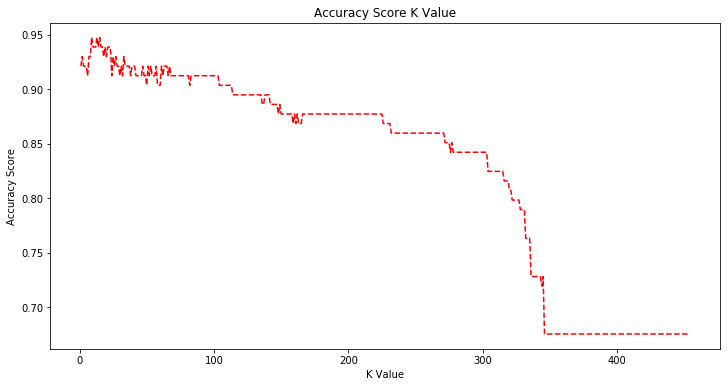

In [90]:
# ANSWER
accuracy = []
# plot test accuracy by number of neighbors:
for i in range(1, X_train.shape[0]):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    accuracy.append(accuracy_score(y_test, pred_i))

plt.figure(figsize=(12, 6))
plt.plot(range(1, X_train.shape[0]), accuracy, color='red', linestyle='dashed', marker= None,
         markerfacecolor='blue', markersize=10)
plt.title('Accuracy Score K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy Score')

**References**

[Breast Cancer Wisconsin (Diagnostic) Data Set](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/downloads/breast-cancer-wisconsin-data.zip/2)

**© 2019 Data Science Institute of Australia**